- In this notebook, we do vesicle detection on microscopy images
- Then construct the data set for modeling

In [2]:
import cv2
import os
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

from utils import *
from batch_run import run_batch_files_templates
import argparse
import pandas as pd
import time
import shutil
import re

In [ ]:
# Add the src directory to sys.path
import sys
sys.path.append(os.path.abspath('../src'))

### Microscopy data processing

In [2]:
template1 = np.load('../Templates/template_656, 640, 71, 71.npy')
template2 = np.load('../Templates/Project_Whole Plate1_1024x1024_200Hz_1%Laser_800gain_B_5_R1.tif_enhance_482_20_56_56.npy')
template3 = np.load('../Templates/1024x1024 - 4 point_no-z-stack - split 5 rows rows only_TileScan 1_C_11_R2.npy')

In [3]:
templates = [template1, template2, template3]

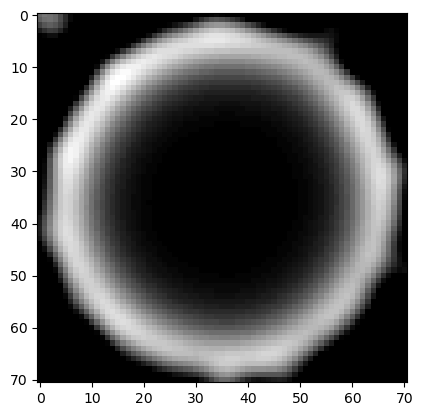

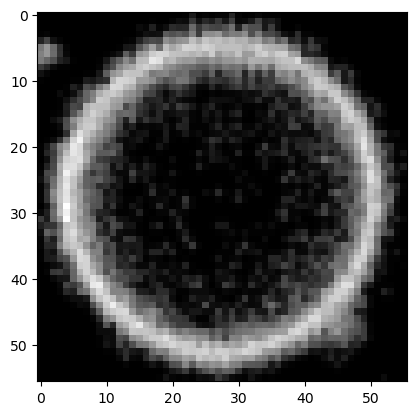

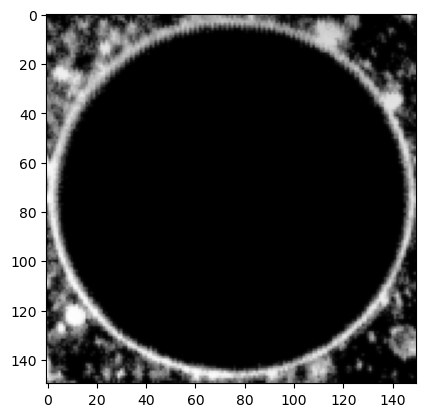

In [4]:
for template in templates:
    plt.imshow(template, cmap='gray')
    plt.show()

In [11]:
file_folder= '../../data/20240517/OriginalImage/20240517_095551_821'
PlateName='Plate_20240518'
# Create the folder if it doesn't exist
folder_path = f"Results_{PlateName}"
os.makedirs(folder_path, exist_ok=True)
# Record the start time
import time
start_time = time.time()
# file_template = load_template(template)
run_batch_files_templates(file_folder, templates, PlateName, \
                min_scale=0.3, max_scale=4, intervals=100, threshold = 0.5)

# Record the end time
end_time = time.time()

# Calculate the running time
running_time = end_time - start_time

print("Script execution time:", running_time, "seconds")

None vesicles found
WellK14_PointK14_0000_ChannelNile Red_Seq0680.ome.tiff
None vesicles found
WellH04_PointH04_0003_ChannelNile Red_Seq0475.ome.tiff
None vesicles found
WellF10_PointF10_0003_ChannelNile Red_Seq0291.ome.tiff
None vesicles found
WellD15_PointD15_0003_ChannelNile Red_Seq0111.ome.tiff
None vesicles found
WellE17_PointE17_0002_ChannelNile Red_Seq0218.ome.tiff
22 vesicles found
WellK05_PointK05_0001_ChannelNile Red_Seq0645.ome.tiff
1 vesicles found
WellH09_PointH09_0000_ChannelNile Red_Seq0452.ome.tiff
None vesicles found
WellE14_PointE14_0002_ChannelNile Red_Seq0206.ome.tiff
None vesicles found
WellC08_PointC08_0001_ChannelNile Red_Seq0021.ome.tiff
1 vesicles found
WellC21_PointC21_0003_ChannelNile Red_Seq0075.ome.tiff
None vesicles found
WellI20_PointI20_0003_ChannelNile Red_Seq0551.ome.tiff
None vesicles found
WellD13_PointD13_0001_ChannelNile Red_Seq0117.ome.tiff
None vesicles found
WellC21_PointC21_0000_ChannelNile Red_Seq0072.ome.tiff
None vesicles found
WellJ15_Point

### Data construction

In [18]:
df = pd.read_csv('../../data/20240517/VesicleDetection/Results_Plate_20240518/Plate_20240518_VesiclesSummary.csv')
df

,filename,num_vesicles,area_vesicles,area_percent
0,WellK14_PointK14_0000_ChannelNile Red_Seq0680....,0,0.000000,0.000000
1,WellH04_PointH04_0003_ChannelNile Red_Seq0475....,0,0.000000,0.000000
2,WellF10_PointF10_0003_ChannelNile Red_Seq0291....,0,0.000000,0.000000
3,WellD15_PointD15_0003_ChannelNile Red_Seq0111....,0,0.000000,0.000000
4,WellE17_PointE17_0002_ChannelNile Red_Seq0218....,0,0.000000,0.000000
...,...,...,...,...
756,WellG13_PointG13_0001_ChannelNile Red_Seq0361....,0,0.000000,0.000000
757,WellL09_PointL09_0001_ChannelNile Red_Seq0741....,0,0.000000,0.000000
758,WellE09_PointE09_0003_ChannelNile Red_Seq0187....,0,0.000000,0.000000
759,WellK07_PointK07_0003_ChannelNile Red_Seq0655....,8,8288.306818,0.007904


In [19]:
df_sorted = df.sort_values(by='filename')
df_sorted

,filename,num_vesicles,area_vesicles,area_percent
16,WellC03_PointC03_0000_ChannelNile Red_Seq0000....,0,0.000000,0.000000
537,WellC03_PointC03_0001_ChannelNile Red_Seq0001....,0,0.000000,0.000000
287,WellC03_PointC03_0002_ChannelNile Red_Seq0002....,0,0.000000,0.000000
621,WellC03_PointC03_0003_ChannelNile Red_Seq0003....,0,0.000000,0.000000
402,WellC04_PointC04_0000_ChannelNile Red_Seq0004....,0,0.000000,0.000000
...,...,...,...,...
686,WellL14_PointL14_0003_ChannelNile Red_Seq0723....,0,0.000000,0.000000
341,WellL15_PointL15_0000_ChannelNile Red_Seq0716....,0,0.000000,0.000000
569,WellL15_PointL15_0001_ChannelNile Red_Seq0717....,0,0.000000,0.000000
286,WellL15_PointL15_0002_ChannelNile Red_Seq0718....,4,1754.579497,0.001673


In [22]:
# Extract the part before the first '_' in 'filename'
df_sorted['group'] = df_sorted['filename'].str.split('_').str[0]

# Group by 'group', take median of other columns, and keep the first row
df_final = df_sorted.groupby('group').agg({
    'filename': 'first',
    'num_vesicles': 'median',
    'area_vesicles': 'median',
    'area_percent': 'median'
}).reset_index(drop=True)

In [23]:
df_final

,filename,num_vesicles,area_vesicles,area_percent
0,WellC03_PointC03_0000_ChannelNile Red_Seq0000....,0.0,0.000000,0.000000
1,WellC04_PointC04_0000_ChannelNile Red_Seq0004....,0.0,0.000000,0.000000
2,WellC05_PointC05_0000_ChannelNile Red_Seq0008....,1.5,400.160364,0.000382
3,WellC06_PointC06_0000_ChannelNile Red_Seq0012....,0.0,0.000000,0.000000
4,WellC07_PointC07_0000_ChannelNile Red_Seq0016....,0.0,0.000000,0.000000
...,...,...,...,...
187,WellL11_PointL11_0000_ChannelNile Red_Seq0732....,0.0,0.000000,0.000000
188,WellL12_PointL12_0000_ChannelNile Red_Seq0728....,0.0,0.000000,0.000000
189,WellL13_PointL13_0000_ChannelNile Red_Seq0724....,8.5,6691.592352,0.006382
190,WellL14_PointL14_0000_ChannelNile Red_Seq0720....,0.0,0.000000,0.000000


In [24]:
# Round num_vesicles to integer
df_final['num_vesicles'] = df_final['num_vesicles'].round().astype(int)
# By default, round() uses "round half to even" (also known as "bankers' rounding") 
df_final

,filename,num_vesicles,area_vesicles,area_percent
0,WellC03_PointC03_0000_ChannelNile Red_Seq0000....,0,0.000000,0.000000
1,WellC04_PointC04_0000_ChannelNile Red_Seq0004....,0,0.000000,0.000000
2,WellC05_PointC05_0000_ChannelNile Red_Seq0008....,2,400.160364,0.000382
3,WellC06_PointC06_0000_ChannelNile Red_Seq0012....,0,0.000000,0.000000
4,WellC07_PointC07_0000_ChannelNile Red_Seq0016....,0,0.000000,0.000000
...,...,...,...,...
187,WellL11_PointL11_0000_ChannelNile Red_Seq0732....,0,0.000000,0.000000
188,WellL12_PointL12_0000_ChannelNile Red_Seq0728....,0,0.000000,0.000000
189,WellL13_PointL13_0000_ChannelNile Red_Seq0724....,8,6691.592352,0.006382
190,WellL14_PointL14_0000_ChannelNile Red_Seq0720....,0,0.000000,0.000000


In [31]:
# Extracting positions from filename column
df_final['position'] = df_final['filename'].str.extract(r'Well([A-Z]+\d+)_')

# Dropping the original filename column
df_final = df_final[['position', 'num_vesicles', 'area_vesicles', 'area_percent']]
df_final

,position,num_vesicles,area_vesicles,area_percent
0,C03,0,0.000000,0.000000
1,C04,0,0.000000,0.000000
2,C05,2,400.160364,0.000382
3,C06,0,0.000000,0.000000
4,C07,0,0.000000,0.000000
...,...,...,...,...
187,L11,0,0.000000,0.000000
188,L12,0,0.000000,0.000000
189,L13,8,6691.592352,0.006382
190,L14,0,0.000000,0.000000


/Users/haoliu/anaconda3/envs/ActiveLearning/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/haoliu/anaconda3/envs/ActiveLearning/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/haoliu/anaconda3/envs/ActiveLearning/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/haoliu/anaconda3/envs/ActiveLearning/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

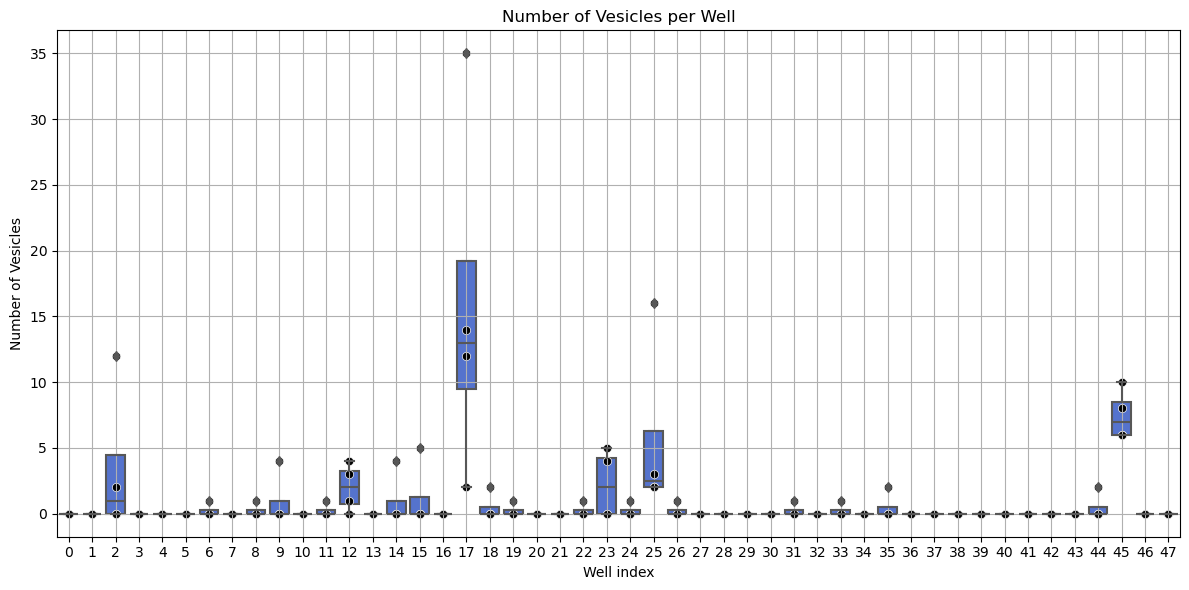

In [34]:
# Create a figure and axis
plt.figure(figsize=(12, 6))
ax = sns.boxplot(x=df_final.index % 48, y='num_vesicles', data=df_final, color='royalblue')

# Scatter plot without NaN values
sns.scatterplot(x=df_final.index % 48, y='num_vesicles', data=df_final.dropna(), color='black', ax=ax)

# Set labels and title
ax.set_xlabel('Well index')
ax.set_ylabel('Number of Vesicles')
ax.set_title('Number of Vesicles per Well')

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()

In [35]:
num_rows_per_df = 48
numeric_df = df_final.select_dtypes(include=np.number)

# Calculate the median values along the rows
median_values = numeric_df.groupby(numeric_df.index % num_rows_per_df).median()

# Print the median values
median_values

,num_vesicles,area_vesicles,area_percent
0,0.0,0.000000,0.000000
1,0.0,0.000000,0.000000
2,1.0,563.130483,0.000537
3,0.0,0.000000,0.000000
4,0.0,0.000000,0.000000
5,0.0,0.000000,0.000000
6,0.0,141.764368,0.000135
7,0.0,86.590148,0.000083
8,0.0,0.000000,0.000000
9,0.0,0.000000,0.000000


In [38]:
# Combine df

In [43]:
dispense_df = pd.read_csv('dispense_df_GPC_20240513.csv')
dispense_df

,Total_decanoic acid_Mass (50 mM),Total_decanoic acid_Mass (10 mM),Total_decanoic acid_Mass (2 mM),Total_decanoate_Mass (50 mM),Total_decanoate_Mass (10 mM),Total_decanoate_Mass (2 mM),Total_decylamine_Mass (50 mM),Total_decylamine_Mass (10 mM),Total_decylamine_Mass (2 mM),Total_decyl trimethylamine_Mass (50 mM),Total_decyl trimethylamine_Mass (10 mM),Total_decyl trimethylamine_Mass (2 mM),Total_decylsulfate_Mass (50 mM),Total_decylsulfate_Mass (10 mM),Total_decylsulfate_Mass (2 mM),Total_decanol_Mass (15 mM),Total_decanol_Mass (3 mM),Total_monocaprin_Mass (10 mM),Total_monocaprin_Mass (2 mM)
0,0.0,0.0,7.8,0.0,16.3,0.0,5.6,0.0,0.0,7.5,0.0,0.0,0.0,12.8,0.0,4.1,0.0,14.4,0.0
1,0.0,6.1,0.0,5.2,0.0,0.0,9.8,0.0,0.0,0.0,7.4,0.0,5.0,0.0,0.0,8.3,0.0,8.5,0.0
2,7.5,0.0,0.0,0.0,4.5,0.0,0.0,19.9,0.0,19.0,0.0,0.0,0.0,0.0,2.7,14.9,0.0,12.7,0.0
3,0.0,0.0,17.1,14.5,0.0,0.0,0.0,0.0,17.2,0.0,13.1,0.0,5.9,0.0,0.0,13.1,0.0,0.0,8.8
4,6.9,0.0,0.0,0.0,0.0,14.5,0.0,12.7,0.0,13.6,0.0,0.0,0.0,0.0,19.6,0.0,19.4,9.0,0.0
5,0.0,0.0,10.9,11.3,0.0,0.0,4.8,0.0,0.0,9.4,0.0,0.0,0.0,0.0,13.2,10.1,0.0,10.7,0.0
6,0.0,0.0,13.4,0.0,16.6,0.0,14.0,0.0,0.0,5.5,0.0,0.0,0.0,13.2,0.0,11.6,0.0,13.3,0.0
7,0.0,0.0,11.3,0.0,12.7,0.0,8.9,0.0,0.0,0.0,10.7,0.0,6.1,0.0,0.0,19.1,0.0,15.2,0.0
8,0.0,0.0,7.4,9.2,0.0,0.0,7.8,0.0,0.0,6.7,0.0,0.0,0.0,5.4,0.0,0.0,4.0,9.4,0.0
9,8.5,0.0,0.0,0.0,15.7,0.0,0.0,0.0,12.9,6.8,0.0,0.0,0.0,4.9,0.0,5.7,0.0,9.8,0.0


In [44]:
# List of solutes you want to extract
solutes = ['decanoic acid', 'decanoate', 'decylamine', 'decyl trimethylamine', 'decylsulfate', 'decanol', 'monocaprin']

# Create a new DataFrame to store the results
result_df = pd.DataFrame()

for solute in solutes:
    solute_columns = [col for col in dispense_df.columns if solute in col]
    concentrations = [float(re.search(r'\d+', col).group()) for col in solute_columns]
    total_mass_column = solute + '_Concentration (mM)'
    result_df[total_mass_column] = (dispense_df[solute_columns] * concentrations).sum(axis=1)

# Display the new DataFrame with the added columns
# Divide all column values by 200
result_df = result_df.div(200)
result_df

,decanoic acid_Concentration (mM),decanoate_Concentration (mM),decylamine_Concentration (mM),decyl trimethylamine_Concentration (mM),decylsulfate_Concentration (mM),decanol_Concentration (mM),monocaprin_Concentration (mM)
0,0.078,0.815,1.400,1.875,0.640,0.3075,0.720
1,0.305,1.300,2.450,0.370,1.250,0.6225,0.425
2,1.875,0.225,0.995,4.750,0.027,1.1175,0.635
3,0.171,3.625,0.172,0.655,1.475,0.9825,0.088
4,1.725,0.145,0.635,3.400,0.196,0.2910,0.450
5,0.109,2.825,1.200,2.350,0.132,0.7575,0.535
6,0.134,0.830,3.500,1.375,0.660,0.8700,0.665
7,0.113,0.635,2.225,0.535,1.525,1.4325,0.760
8,0.074,2.300,1.950,1.675,0.270,0.0600,0.470
9,2.125,0.785,0.129,1.700,0.245,0.4275,0.490


In [45]:
df_combine = pd.concat([result_df, median_values], axis=1)
df_combine

,decanoic acid_Concentration (mM),decanoate_Concentration (mM),decylamine_Concentration (mM),decyl trimethylamine_Concentration (mM),decylsulfate_Concentration (mM),decanol_Concentration (mM),monocaprin_Concentration (mM),num_vesicles,area_vesicles,area_percent
0,0.078,0.815,1.400,1.875,0.640,0.3075,0.720,0.0,0.000000,0.000000
1,0.305,1.300,2.450,0.370,1.250,0.6225,0.425,0.0,0.000000,0.000000
2,1.875,0.225,0.995,4.750,0.027,1.1175,0.635,1.0,563.130483,0.000537
3,0.171,3.625,0.172,0.655,1.475,0.9825,0.088,0.0,0.000000,0.000000
4,1.725,0.145,0.635,3.400,0.196,0.2910,0.450,0.0,0.000000,0.000000
5,0.109,2.825,1.200,2.350,0.132,0.7575,0.535,0.0,0.000000,0.000000
6,0.134,0.830,3.500,1.375,0.660,0.8700,0.665,0.0,141.764368,0.000135
7,0.113,0.635,2.225,0.535,1.525,1.4325,0.760,0.0,86.590148,0.000083
8,0.074,2.300,1.950,1.675,0.270,0.0600,0.470,0.0,0.000000,0.000000
9,2.125,0.785,0.129,1.700,0.245,0.4275,0.490,0.0,0.000000,0.000000


In [46]:
df_combine.to_csv('df_combine_20240518.csv', index=False)

In [1]:
import pandas as pd
df_combine = pd.read_csv('df_combine_20240518.csv')
df_concentration = df_combine.iloc[:,0:7]
df_concentration.to_csv('df_concentration_20240518.csv', index=False)